HR departmanı maaş Skalası hesaplama

In [ ]:
"""
a0, a1, a2, a3...,an 
P(x) = a0 + a1*x + a2*x^2 + a3*x^3 + ... + an*x^n
biçimindeki ifadelere x değişkenine göre düzenlenmiş reel katsayılı polinom(çok terimli) denir.
polinom=çok terimli fonksiyon.
"""

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#veri setimizi pandas yardımıyla alıp dataframe nesnemizolan df'in içine aktarıyoruz..
df=pd.read_csv("polynomial.csv",sep=";")



In [3]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


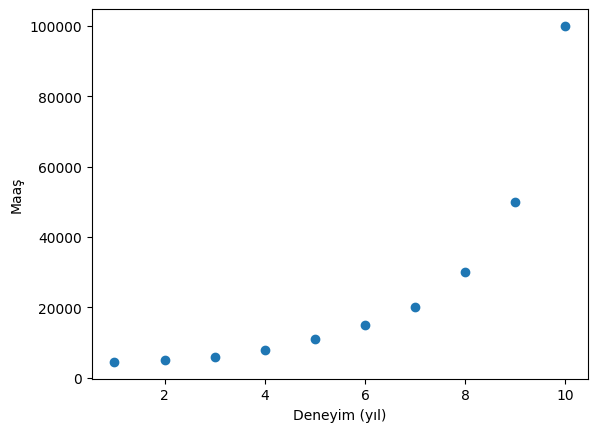

In [4]:
#veri setimize tekrar bakalım
plt.scatter(df['deneyim'],df['maas'])
plt.xlabel('Deneyim (yıl)')
plt.ylabel('Maaş')
plt.savefig('1.png',dpi=300)
plt.show()

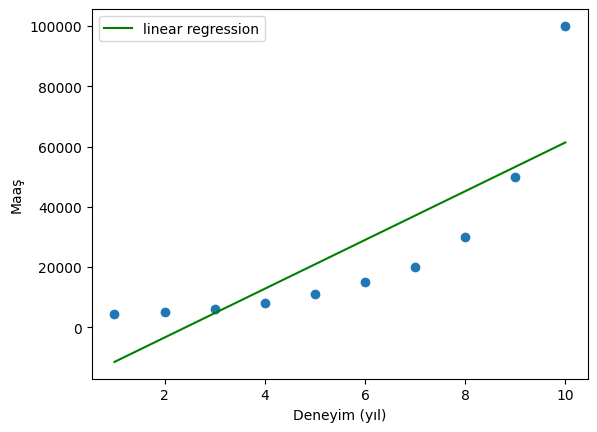

In [5]:
#Göründüğü gibi doğrusal bir yapıda dağılmıyor veriler 
#Eğer biz bu veri setine linear regression uygularsak hiç uygun olmayan bir tahmin çizgisi görürüz:

reg=LinearRegression()
reg.fit(df[['deneyim']],df[['maas']])

plt.xlabel('Deneyim (yıl)')
plt.ylabel('Maaş')

plt.scatter(df['deneyim'],df['maas'])

xekseni=df[['deneyim']]
yekseni=reg.predict(df[['deneyim']])
plt.plot(xekseni,yekseni,color='green',label="linear regression")
plt.legend()
plt.show()

In [ ]:
#tahmin çok kötü bir doğru, demek ki neymiş: Bu veri seti için lineer regresyon uygulamak doğru değilmiş. unutmayın veri setinize göre model seçeceksiniz! öncelikle veri setinize çok hakim olmalı ve bilmelisiniz!!!

In [ ]:
#bir adet polynomial regression nesnesi oluşturması için polynomialFeatures fonksiyonu çağırıyoruz
#Bu fonksiyonu çağırırken polinam derecesini (N) belirliyoruz:
#degree=2 dersek 2.dereceden polinom, degree=3 dersek 3.dereceden polinom olur.
polynomial_regression=PolynomialFeatures(degree=4) #degree= N bknz. yukarıdaki polinom fonksiyonu..

x_polynomial=polynomial_regression.fit_transform(df[['deneyim']])

In [17]:
#regresion model nesnemizi olan reg nesnemizi oluşturup bunun fit metodunu çağırarak x_polynomial ve y eksenleri fit ediyor
#yani ragresyon modelimizi mevcut gerçek verilerle eğitiyoruz
reg=LinearRegression()
reg.fit(x_polynomial,df[['maas']]) 

LinearRegression()

Artık modelimiz hazır ve eğitilmiş, şimdi eldeki verilere göre modelmiz nasıl bir sonuç grafiği oluşturuyor onu görelim:

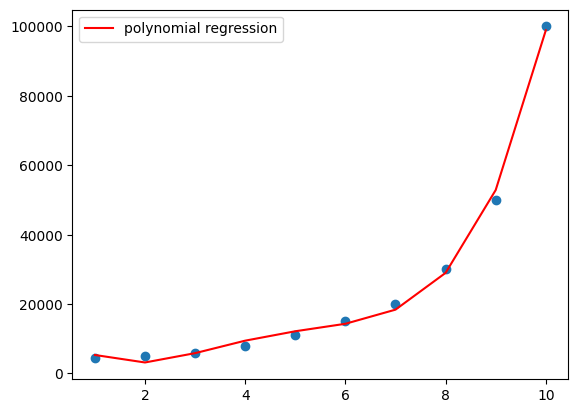

In [18]:
y_head=reg.predict(x_polynomial)
plt.plot(df['deneyim'],y_head,color='red',label='polynomial regression')
#plt.plot(xekseni,yekseni,color='green',label="linear regression")
plt.legend()

#veri setimizi de noktalar olarak scatter edelim de görelim bakalım uymuş mu polynomial regression:
plt.scatter(df['deneyim'],df['maas'])

plt.show()

Gördüğünüz gibi kesinlikle uymuş diyebiliriz, polynomail regression doğru bir seçim. şimdi bir de N=3 veya 4 yapıp görelim polinom  derecesini artırdığımızda daha güzel fit edecekmi acaba?

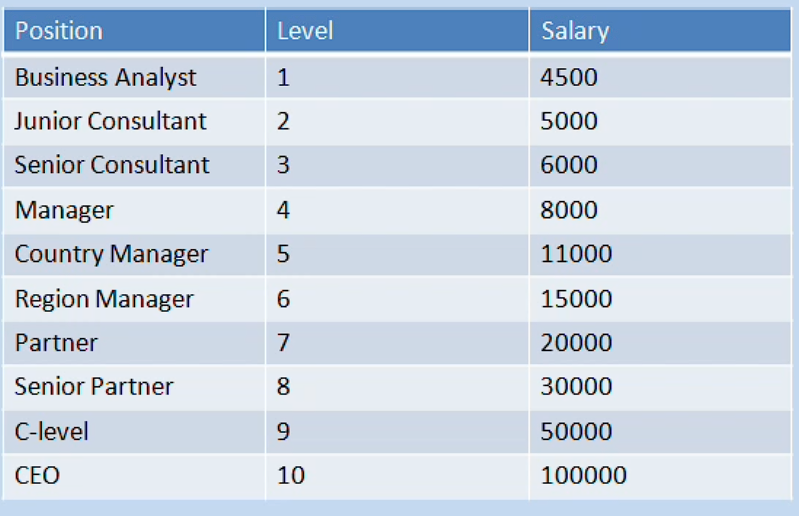

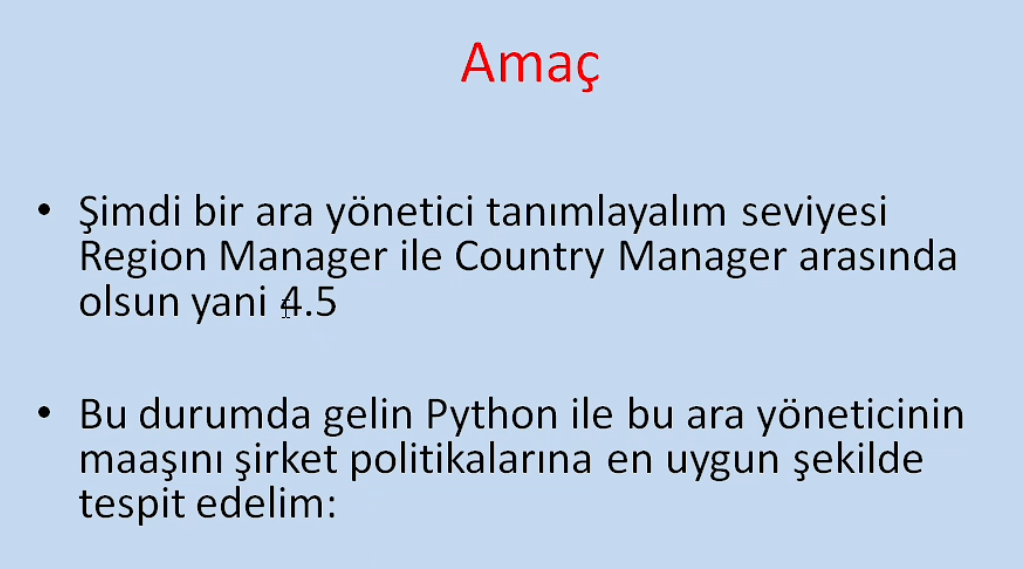

In [19]:
x_polynomial1=polynomial_regression.fit_transform([[4.5]])
reg.predict(x_polynomial1)

array([[10958.21496211]])

Alacağı maaş çok güzel bir şekilde şirket politikasına fit etmiş oluyor hakkı yenmeden! :)